In [36]:
import re
import pandas as pd
import numpy as np
from ete3 import Tree, NodeStyle, TreeStyle, NodeStyle, faces, AttrFace, CircleFace
from ete3 import NCBITaxa

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
jnatprod = pd.read_csv('data/entities_img_dataframe_jnatprod.tsv', sep='\t')  
metabo = pd.read_csv('data/entities_img_dataframe_metabo.tsv', sep='\t')
phytorev = pd.read_csv('data/entities_img_dataframe_phytorev.tsv', sep='\t')  
qn = pd.read_csv('data/entities_img_dataframe_qn.tsv', sep='\t')
chrom_a = pd.read_csv('data/entities_img_dataframe_chroma_a.tsv', sep='\t')
chrom_b = pd.read_csv('data/entities_img_dataframe_chroma_b.tsv', sep='\t')

/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/rsilva/miniconda3/envs/nplibrary/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
comp = pd.concat([jnatprod[['doi', 'smiles', 'standardInChIKey', 'standardInChI']],
                  metabo[['doi', 'smiles', 'standardInChIKey', 'standardInChI']],
                  phytorev[['doi', 'smiles', 'standardInChIKey', 'standardInChI']],
                  qn[['doi', 'smiles', 'standardInChIKey', 'standardInChI']],
                  chrom_a[['doi', 'smiles', 'standardInChIKey', 'standardInChI']],
                  chrom_b[['doi', 'smiles', 'standardInChIKey', 'standardInChI']]])
comp.fillna('', inplace=True)
comp.reset_index(drop=True, inplace=True)

In [4]:
gn_jnatprod = pd.read_csv('data/gn_dataframe_jnatprod.tsv', sep='\t')  
gn_metabo = pd.read_csv('data/gn_dataframe_metabo.tsv', sep='\t')  
gn_phytorev = pd.read_csv('data/gn_dataframe_phytorev.tsv', sep='\t')  
gn_qn = pd.read_csv('data/gn_dataframe_qn.tsv', sep='\t')
gn_chrom_a = pd.read_csv('data/gn_dataframe_chroma_a.tsv', sep='\t')
gn_chrom_b = pd.read_csv('data/gn_dataframe_chroma_b.tsv', sep='\t')

In [5]:
gn = pd.concat([gn_jnatprod, gn_metabo,
                gn_phytorev, gn_qn,
                gn_chrom_a, gn_chrom_b])
gn.reset_index(drop=True, inplace=True)
gn.head()

,doi,verbatim,odds,dataSourceId,taxonId,classificationPath,classificationRank,matchType
0,np100762s_gn.txt,Mammea americana,3.691610e+07,1.0,53490549,Plantae|Tracheophyta|Magnoliopsida|Malpighiale...,kingdom|phylum|class|order|family|genus|species,ExactCanonicalMatch
1,np100762s_gn.txt,Mammea,1.110529e+04,1.0,54930310,Plantae|Tracheophyta|Magnoliopsida|Malpighiale...,kingdom|phylum|class|order|family|genus,ExactMatch
2,np100762s_gn.txt,Mammea americana,3.691610e+07,1.0,53490549,Plantae|Tracheophyta|Magnoliopsida|Malpighiale...,kingdom|phylum|class|order|family|genus|species,ExactCanonicalMatch
3,np100762s_gn.txt,Mammea,1.110529e+04,1.0,54930310,Plantae|Tracheophyta|Magnoliopsida|Malpighiale...,kingdom|phylum|class|order|family|genus,ExactMatch
4,np100762s_gn.txt,Mammea,1.110529e+04,1.0,54930310,Plantae|Tracheophyta|Magnoliopsida|Malpighiale...,kingdom|phylum|class|order|family|genus,ExactMatch


In [6]:
gn.loc[0, 'classificationRank'].split('|')

['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']

In [7]:
template = gn.loc[0, 'classificationRank'].split('|')

path = []

for i in gn.index:
    tmp = ['']*len(template) 
    if pd.isnull(gn.loc[i, 'classificationRank']):
        path.append(tmp)
        continue
    opath = np.array(gn.loc[i, 'classificationPath'].split('|'))
    rank = np.array(gn.loc[i, 'classificationRank'].split('|'))  
    for j in range(len(template)):
        if template[j] in rank:
            tmp[j] = opath[rank==template[j]][0]
    path.append(tmp)

In [8]:
gn.shape

(699909, 8)

In [9]:
dfpath = pd.DataFrame(path)
dfpath.columns = template

dfpath.head(20)

,kingdom,phylum,class,order,family,genus,species
0,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Calophyllaceae,Mammea,Mammea americana
1,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Calophyllaceae,Mammea,
2,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Calophyllaceae,Mammea,Mammea americana
3,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Calophyllaceae,Mammea,
4,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Calophyllaceae,Mammea,
5,,Mollusca,Gastropoda,Stylommatophora,Urocyclidae,Elisolimax,
6,,Mollusca,Gastropoda,Stylommatophora,Urocyclidae,Elisolimax,
7,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Calophyllaceae,Mammea,Mammea americana
8,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Calophyllaceae,Mammea,
9,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Calophyllaceae,Mammea,


In [10]:
gn.tail()

,doi,verbatim,odds,dataSourceId,taxonId,classificationPath,classificationRank,matchType
699904,S1570023202000892_gn.txt,"Pirola,",92544.079115,165.0,145228257,NaN,NaN,ExactCanonicalMatch
699905,S1570023210006136_gn.txt,(ELISA),6646.583623,9.0,urn:lsid:marinespecies.org:taxname:998624,Biota|Animalia|Mollusca|Gastropoda|Heterobranc...,|Kingdom|phylum|class|subclass|infraclass|subt...,ExactCanonicalMatch
699906,S1570023210006136_gn.txt,Dima,597.813304,181.0,urn:lsid:irmng.org:taxname:1290455,Biota|Animalia|Arthropoda|Hexapoda|Insecta|Col...,|Kingdom|phylum|subphylum|class|order|family|g...,ExactCanonicalMatch
699907,S1570023210006136_gn.txt,"Politi,",28.194671,9.0,urn:lsid:marinespecies.org:taxname:1252102,Biota|Plantae|Viridiplantae|Streptophyta|Trach...,|Kingdom|subkingdom|infrakingdom|phylum|subdiv...,ExactCanonicalMatch
699908,S1570023210006136_gn.txt,"Aprea,",4076.571289,181.0,urn:lsid:irmng.org:taxname:1456589,Biota|Animalia|Arthropoda|Hexapoda|Insecta|Col...,|Kingdom|phylum|subphylum|class|order|family|g...,ExactCanonicalMatch


In [11]:
dfpath.tail()

,kingdom,phylum,class,order,family,genus,species
699904,,,,,,,
699905,,Mollusca,Gastropoda,Stylommatophora,Urocyclidae,Elisolimax,
699906,,Arthropoda,Insecta,Coleoptera,Elateridae,Dima,
699907,,Tracheophyta,Magnoliopsida,Asterales,Compositae,Erigeron,
699908,,Arthropoda,Insecta,Coleoptera,Chrysomelidae,Apraea,


In [12]:
ncbi = NCBITaxa()

In [13]:
dfpath['kingdom'].value_counts()

                  326786
Plantae           185307
Animalia          103081
Bacteria           40115
Fungi              37861
Chromista           3048
Protista            1229
Metazoa              876
Protozoa             557
Viridiplantae        537
Archaea              510
Archaeplastida         1
Chlorobiota            1
Name: kingdom, dtype: int64

In [33]:
dfpath.loc[dfpath['kingdom']=='Archaea', 'genus'].value_counts()[:30]

                       187
Sulfolobus              57
Halobacterium           44
Methanobacterium        28
Ignicoccus              25
Methanococcus           25
Methanocaldococcus      20
Methanosarcina          19
Pyrococcus              15
Thermococcus            13
Thermoplasma             8
Haloferax                7
Haloarcula               7
Methanococcoides         6
Methanobrevibacter       6
Methanothrix             6
Pyrobaculum              4
Natrialba                4
Methanopyrus             3
Archaeoglobus            2
Methanospirillum         2
Methanothermus           2
Aeropyrum                2
Halorubrum               2
Methanothermobacter      2
Pyrodictium              2
Methanolobus             2
Methanoculleus           1
Acidianus                1
Natronobacterium         1
Name: genus, dtype: int64

In [15]:
dfpath[dfpath['genus']=='Ikeda'].head()

,kingdom,phylum,class,order,family,genus,species
19,Animalia,Annelida,Polychaeta,Echiuroidea,Ikedidae,Ikeda,
3687,Animalia,Annelida,Polychaeta,Echiuroidea,Ikedidae,Ikeda,
4924,Animalia,Annelida,Polychaeta,Echiuroidea,Ikedidae,Ikeda,
5805,Animalia,Annelida,Polychaeta,Echiuroidea,Ikedidae,Ikeda,
5807,Animalia,Annelida,Polychaeta,Echiuroidea,Ikedidae,Ikeda,


In [18]:
dfpath.loc[dfpath['genus']=='Ikeda', 'species'].value_counts()

    1890
Name: species, dtype: int64

In [19]:
gns = dfpath.loc[dfpath['kingdom']=='Animalia', 'genus'].value_counts()[:50].index
for g in gns:
    nspc = (dfpath.loc[dfpath['genus']==g, 'species']!='').sum()
    if nspc:
        print(g, nspc)

 156
Turbo 7
Spodoptera 453
Dysidea 130
Artemia 407
Aedes 426
Sinularia 235
Plakortis 149
Haliclona 118
Agelas 165
Oliva 1
Aplysina 181
Theonella 128
Helix 271
Petrosia 71


In [20]:
#name2taxid = ncbi.get_name_translator(list(labels.keys()))
name2taxid = ncbi.get_name_translator(['Plantae', 'Animalia', 'Fungi', 'Bacteria', 'Archaea',
                                      'Arabidopsis', 'Catharanthus', 'Salvia',
                                      'Spodoptera', 'Artemia', 'Aedes',
                                      'Aspergillus', 'Candida', 'Fusarium',
                                      'Escherichia', 'Streptomyces', 'Staphylococcus',
                                      'Sulfolobus', 'Halobacterium', 'Methanobacterium'])
name2taxid

{'Aedes': [7158, 149531],
 'Arabidopsis': [3701],
 'Archaea': [2157],
 'Artemia': [6660],
 'Aspergillus': [5052],
 'Bacteria': [2],
 'Candida': [5475, 1535326],
 'Catharanthus': [4057],
 'Escherichia': [561],
 'Fungi': [4751],
 'Fusarium': [5506],
 'Halobacterium': [2239],
 'Methanobacterium': [2160],
 'Salvia': [21880],
 'Spodoptera': [7106],
 'Staphylococcus': [1279],
 'Streptomyces': [1883],
 'Sulfolobus': [2284],
 'Animalia': [33208]}

In [21]:
[x[0] for x in list(name2taxid.values())]

[7158,
 3701,
 2157,
 6660,
 5052,
 2,
 5475,
 4057,
 561,
 4751,
 5506,
 2239,
 2160,
 21880,
 7106,
 1279,
 1883,
 2284,
 33208]

In [22]:
tree = ncbi.get_topology([x[0] for x in list(name2taxid.values())])
print (tree.get_ascii(attributes=["sci_name", "rank"]))


                                                                     /-Halobacterium, genus
                                                /Euryarchaeota, phylum
                           /Archaea, superkingdom                    \-Methanobacterium, genus
                          |                    |
                          |                     \-Sulfolobus, genus
                          |
                          |                                                                                                     /-Aedes, genus
                          |                                                                                 /Holometabola, cohort
                          |                                            /Metazoa, kingdomPancrustacea, no rank                   \-Spodoptera, genus
                          |                                           |                                    |
                          |                                       

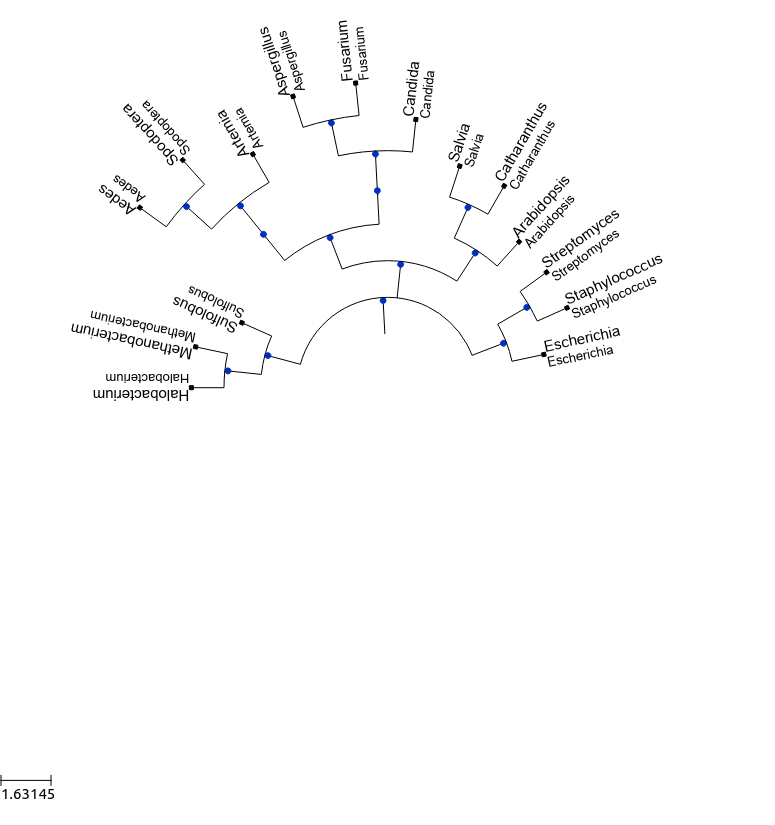

In [23]:
#http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html
#https://grunwaldlab.github.io/metacoder_documentation/workshop--05--plotting.html

ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180

for n in tree.traverse():
    if n.is_leaf():
        n.name = n.sci_name

tree.render("%%inline", tree_style=ts)

In [24]:
sdict = {}

for n in tree.traverse():
    if not n.is_leaf():
        print(n.name)
        nm = n.get_closest_leaf()[0]
        nm = re.sub(".+'\n--(\w+)'.+", "\\1", str(nm))
        nm = nm.replace('\n--', '')
        print(nm)
        sdict[nm] = len(dfpath.loc[dfpath['genus']==nm])

131567
Sulfolobus
2157
Sulfolobus
2759
Arabidopsis
2
Escherichia
28890
Halobacterium
33154
Artemia
1437201
Arabidopsis
1783272
Streptomyces
33208
Artemia
4751
Candida
91888
Salvia
197562
Artemia
716545
Candida
33392
Aedes
716546
Aspergillus


In [25]:
for k,v in sdict.items():
    sdict[k] = v/sum(sdict.values())

In [26]:
sdict

{'Sulfolobus': 0.0022790883646541383,
 'Arabidopsis': 0.21215883927669046,
 'Escherichia': 0.2563683312938768,
 'Halobacterium': 0.003009684863638332,
 'Artemia': 0.03574497862498914,
 'Streptomyces': 0.33619102676748897,
 'Candida': 0.3211199927259329,
 'Salvia': 0.3086435895239747,
 'Aedes': 0.09978363812064167,
 'Aspergillus': 0.9996004390404684}

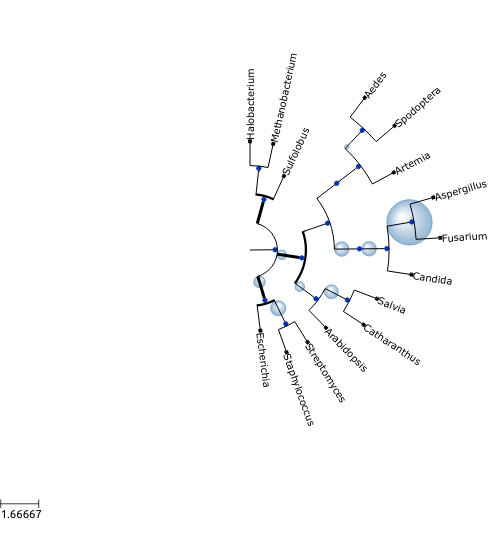

In [27]:
def layout(node):
    if node.is_leaf():
        nameF = faces.TextFace(node.name, tight_text=False, fgcolor='black')
        faces.add_face_to_node(nameF, node, column=0, position="branch-right")
        #pieF = PieChartFace([10, 20, 60, 10], 
        #                    colors=COLOR_SCHEMES[sample(schema_names, 1)[0]],
        #                    width=40, height=40)
        #add_face_to_node(pieF, node, column=0, position='aligned')
        #node.img_style['size'] = 0
    else:
        #node.img_style['size'] = randint(3, 6)
        #node.img_style['shape'] = "square"
        #node.img_style['fgcolor'] = "green"
        nm = node.get_closest_leaf()[0]
        nm = re.sub(".+'\n--(\w+)'.+", "\\1", str(nm))
        nm = nm.replace('\n--', '')
        bubble_face = CircleFace(sdict[nm]*30, 'steelblue', 'sphere')
        bubble_face.opacity = 0.6
        faces.add_face_to_node(bubble_face, node, column=0, position="float-behind")
        #add_face_to_node(AttrFace("dist", fsize=7, fgcolor="red"), node,
                        #column=0, position="branch-top")
        if node.up and not node.up.up:
            node.img_style['vt_line_width'] = 3
            node.img_style['hz_line_width'] = 4

ts = TreeStyle()
ts.layout_fn = layout
ts.show_leaf_name = False
ts.mode = 'c'
ts.arc_start = 270
ts.arc_span =185
ts.draw_guiding_lines=False
ts.draw_guiding_lines=False
ts.scale = 30
#t = Tree()
#t.populate(20)
tree.render("%%inline", w=500, tree_style=ts)

In [29]:
tree.render("genera_tree_updated.pdf", w=500, tree_style=ts)

{'nodes': [[272.3602562572907,
   247.0618585556328,
   277.72658304249086,
   252.42818534083298,
   0,
   None],
  [260.6792214446216,
   196.1599018559565,
   267.21284386929443,
   202.6935242806294,
   1,
   None],
  [255.8935376838444,
   165.44418785431787,
   261.74598892375667,
   171.29663909423016,
   2,
   None],
  [248.1026729062117,
   139.40470803309498,
   251.89732709378828,
   143.19936222067156,
   3,
   None],
  [270.95894552750656,
   141.55181772257566,
   275.47655816174904,
   146.06943035681815,
   4,
   None],
  [281.4326813610813,
   173.5609376575641,
   286.4647327520419,
   178.59298904852471,
   5,
   None],
  [298.8357282483172,
   254.8789244529941,
   304.88810455122274,
   260.9313007558996,
   6,
   None],
  [324.213809138936,
   219.77772470455523,
   330.97126060753743,
   226.53517617315663,
   7,
   None],
  [333.0159003634455,
   179.5155458483515,
   340.4660757314105,
   186.96572121631652,
   8,
   None],
  [354.6856791043005,
   162.83760923

In [34]:
sizes = {'Arabidopsis':5294, 'Catharanthus':2041, 'Salvia':1943, 
         'Spodoptera':555, 'Artemia':519, 'Aedes':428, 
         'Escherichia': 5040, 'Streptomyces': 4476, 'Aspergillus': 3941, 
         'Candida': 2996, 'Fusarium': 1916, 'Staphylococcus': 3838, 
         'Sulfolobus': 57, 'Halobacterium': 44, 'Methanobacterium':  28}

In [37]:
x = np.arange(1, len(sizes)+1)*100
y = range(len(sizes))

labels = []
for k,v in sizes.items():
    labels.append(f'{k}:{v}')


with PdfPages('proportion_genus_updated.pdf') as pdf:
    plt.xlim(-100, 1600)
    plt.ylim(-5, 15)
    plt.scatter(x, y, s=list(sizes.values()), alpha=0.5)
    for label, i, j in zip(labels, x, y):
        plt.annotate(label, xy = (i, j))
    pdf.savefig()
    plt.close()

In [26]:
gn.shape

(699909, 8)

In [27]:
dfpath.shape

(699909, 7)

In [28]:
gn.tail()

,doi,verbatim,odds,dataSourceId,taxonId,classificationPath,classificationRank,matchType
699904,S1570023202000892_gn.txt,"Pirola,",92544.079115,165.0,145228257,NaN,NaN,ExactCanonicalMatch
699905,S1570023210006136_gn.txt,(ELISA),6646.583623,9.0,urn:lsid:marinespecies.org:taxname:998624,Biota|Animalia|Mollusca|Gastropoda|Heterobranc...,|Kingdom|phylum|class|subclass|infraclass|subt...,ExactCanonicalMatch
699906,S1570023210006136_gn.txt,Dima,597.813304,181.0,urn:lsid:irmng.org:taxname:1290455,Biota|Animalia|Arthropoda|Hexapoda|Insecta|Col...,|Kingdom|phylum|subphylum|class|order|family|g...,ExactCanonicalMatch
699907,S1570023210006136_gn.txt,"Politi,",28.194671,9.0,urn:lsid:marinespecies.org:taxname:1252102,Biota|Plantae|Viridiplantae|Streptophyta|Trach...,|Kingdom|subkingdom|infrakingdom|phylum|subdiv...,ExactCanonicalMatch
699908,S1570023210006136_gn.txt,"Aprea,",4076.571289,181.0,urn:lsid:irmng.org:taxname:1456589,Biota|Animalia|Arthropoda|Hexapoda|Insecta|Col...,|Kingdom|phylum|subphylum|class|order|family|g...,ExactCanonicalMatch


In [29]:
dfpath.tail()

,kingdom,phylum,class,order,family,genus,species
699904,,,,,,,
699905,,Mollusca,Gastropoda,Stylommatophora,Urocyclidae,Elisolimax,
699906,,Arthropoda,Insecta,Coleoptera,Elateridae,Dima,
699907,,Tracheophyta,Magnoliopsida,Asterales,Compositae,Erigeron,
699908,,Arthropoda,Insecta,Coleoptera,Chrysomelidae,Apraea,


In [30]:
cls = pd.read_csv('data/npmine_tmp_class.tsv', sep='\t')
cls['inchikey'] = cls['inchikey'].str.replace('InChIKey=', '')
cls.head()

,inchikey,superclass_name,superclass_id,class_name,class_id,subclass_name,subclass_id
0,MBMQEIFVQACCCH-QBODLPLBSA-N,Phenylpropanoids and polyketides,CHEMONTID:0000261,Macrolides and analogues,CHEMONTID:0000147,Zearalenones,CHEMONTID:0001788
1,RGSFGYAAUTVSQA-UHFFFAOYSA-N,Hydrocarbons,CHEMONTID:0002837,Saturated hydrocarbons,CHEMONTID:0004474,Cycloalkanes,CHEMONTID:0001016
2,BUGBHKTXTAQXES-UHFFFAOYSA-N,Homogeneous non-metal compounds,CHEMONTID:0000423,Homogeneous other non-metal compounds,CHEMONTID:0000434,NaN,NaN
3,YZXBAPSDXZZRGB-DOFZRALJSA-N,Lipids and lipid-like molecules,CHEMONTID:0000012,Fatty Acyls,CHEMONTID:0003909,Fatty acids and conjugates,CHEMONTID:0000262
4,NPDODHDPVPPRDJ-UHFFFAOYSA-N,Miscellaneous inorganic compounds,CHEMONTID:0001568,Inorganic oxides,CHEMONTID:0003944,NaN,NaN


In [31]:
len(cls['inchikey'].unique())

83150

In [32]:
cls.shape

(83150, 7)

In [34]:
comp.head()

,smiles,standardInChIKey,standardInChI
0,,MBMQEIFVQACCCH-QBODLPLBSA-N,InChI=1S/C18H22O5/c1-12-6-5-9-14(19)8-4-2-3-7-...
1,,RGSFGYAAUTVSQA-UHFFFAOYSA-N,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2
2,,OKTJSMMVPCPJKN-UHFFFAOYSA-N,InChI=1S/C
3,,BUGBHKTXTAQXES-UHFFFAOYSA-N,InChI=1S/Se
4,,OKTJSMMVPCPJKN-UHFFFAOYSA-N,InChI=1S/C


In [36]:
cls = pd.merge(comp[['doi', 'standardInChIKey']], 
               cls[['inchikey', 'superclass_name', 
                    'class_name', 'subclass_name']],
               left_on='standardInChIKey',
               right_on='inchikey')
cls.shape

(714740, 6)

In [37]:
cls.head()

,doi,standardInChIKey,inchikey,superclass_name,class_name,subclass_name
0,np50051a041,MBMQEIFVQACCCH-QBODLPLBSA-N,MBMQEIFVQACCCH-QBODLPLBSA-N,Phenylpropanoids and polyketides,Macrolides and analogues,Zearalenones
1,np200062x,MBMQEIFVQACCCH-QBODLPLBSA-N,MBMQEIFVQACCCH-QBODLPLBSA-N,Phenylpropanoids and polyketides,Macrolides and analogues,Zearalenones
2,acs.jnatprod.6b00473,MBMQEIFVQACCCH-QBODLPLBSA-N,MBMQEIFVQACCCH-QBODLPLBSA-N,Phenylpropanoids and polyketides,Macrolides and analogues,Zearalenones
3,np058095b,MBMQEIFVQACCCH-QBODLPLBSA-N,MBMQEIFVQACCCH-QBODLPLBSA-N,Phenylpropanoids and polyketides,Macrolides and analogues,Zearalenones
4,np50070a052,MBMQEIFVQACCCH-QBODLPLBSA-N,MBMQEIFVQACCCH-QBODLPLBSA-N,Phenylpropanoids and polyketides,Macrolides and analogues,Zearalenones


In [38]:
cls.tail()

,doi,standardInChIKey,inchikey,superclass_name,class_name,subclass_name
714735,S0021967301965926,PTMHPRAIXMAOOB-UHFFFAOYSA-N,PTMHPRAIXMAOOB-UHFFFAOYSA-N,Homogeneous non-metal compounds,Non-metal oxoanionic compounds,Non-metal phosphonates
714736,S1570023209007867,PTMHPRAIXMAOOB-UHFFFAOYSA-N,PTMHPRAIXMAOOB-UHFFFAOYSA-N,Homogeneous non-metal compounds,Non-metal oxoanionic compounds,Non-metal phosphonates
714737,S1570023204000455,PTMHPRAIXMAOOB-UHFFFAOYSA-N,PTMHPRAIXMAOOB-UHFFFAOYSA-N,Homogeneous non-metal compounds,Non-metal oxoanionic compounds,Non-metal phosphonates
714738,S0021967301895236,YNHJECZULSZAQK-UHFFFAOYSA-N,YNHJECZULSZAQK-UHFFFAOYSA-N,Organoheterocyclic compounds,Tetrapyrroles and derivatives,Porphyrins
714739,S002196730193506X,KSFOVUSSGSKXFI-UHFFFAOYSA-N,KSFOVUSSGSKXFI-UHFFFAOYSA-N,Organoheterocyclic compounds,Tetrapyrroles and derivatives,Porphyrins
